# Lab Session 3: GitHub

> Friday 09-19-2025, 9AM-11AM & 1PM-3PM & 3PM-5PM
>
> Instructors: [Jimmy Butler](https://statistics.berkeley.edu/people/james-butler) & [Sequoia Andrade](https://statistics.berkeley.edu/people/sequoia-rose-andrade)

**Plan for today:**

  1. **Creating your own GitHub repos**. You've cloned repos that someone else has already created. How can you create your own to clone?

  1. **Simulating a GitHub Collaboration Pair**. Last week, we simulated two colleagues working on the same git repository with the use of local branches. Today, we will split up into pairs and you will get practice pushing to the same repo and attempting to resolve any merge conflicts as they arise.

  1. **Reconstructing past versions**. Let's say you want to back to previous versions of a repository (marked by previous commits), or that you want to recover deleted files? We'll go through that today.

  1. **Forks and Pull Requests (if time)**. Let's say we have a collaboration where you don't have write access to a repository but you would like to suggest changes. We will go over how to fork repositories, make our edits, and suggest they be merged into the main repo with a pull request.

**Useful links:**
- [JupyterHub](https://stat159.datahub.berkeley.edu/hub/login?next=%2Fhub%2F)
- [Dotfiles](https://github.com/fperez/dotfiles)

## 1. GitHub Check-In


### 1.1 Authentication

Recall that whenever we want to interact with repos hosted on GitHub, we must authenticate using the `GHAUTH.ipynb` notebook. If you don't already have it, go to the `shared` directory and make a copy of `GHAUTH.ipynb` in your home directory. If this is your first time using it, follow the one-time step at the top of the notebook. Then, run the cell and enter the 8 digit code in the field at the provided link.

If you already have this notebook, simply open it and authenticate as usual.

### 1.2 Creating your Own GitHub Repos

We've practiced cloning repos that have already been created for you and pushing changes to those repos (you did it for HW1!). We will also cover how to create your own repos.

#### Starting from Scratch

First, we'll go through how to create an empty repo on GitHub, clone it to our JupyterHub accounts, and make some edits.

1. Create a new repository in GitHub inside your personal account. For this, you can decide to create an empty repository or fill it with some basic content (for example, a `README.md` file) that renders on the repo landing page. For now, let's create an empty repository.
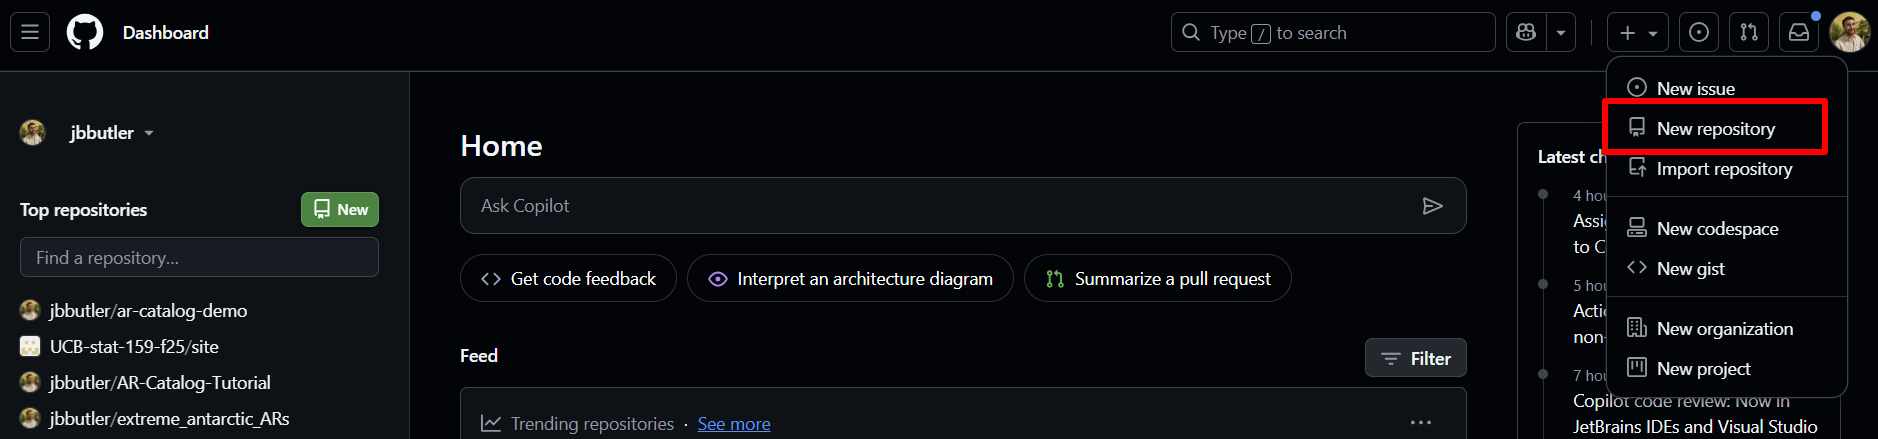

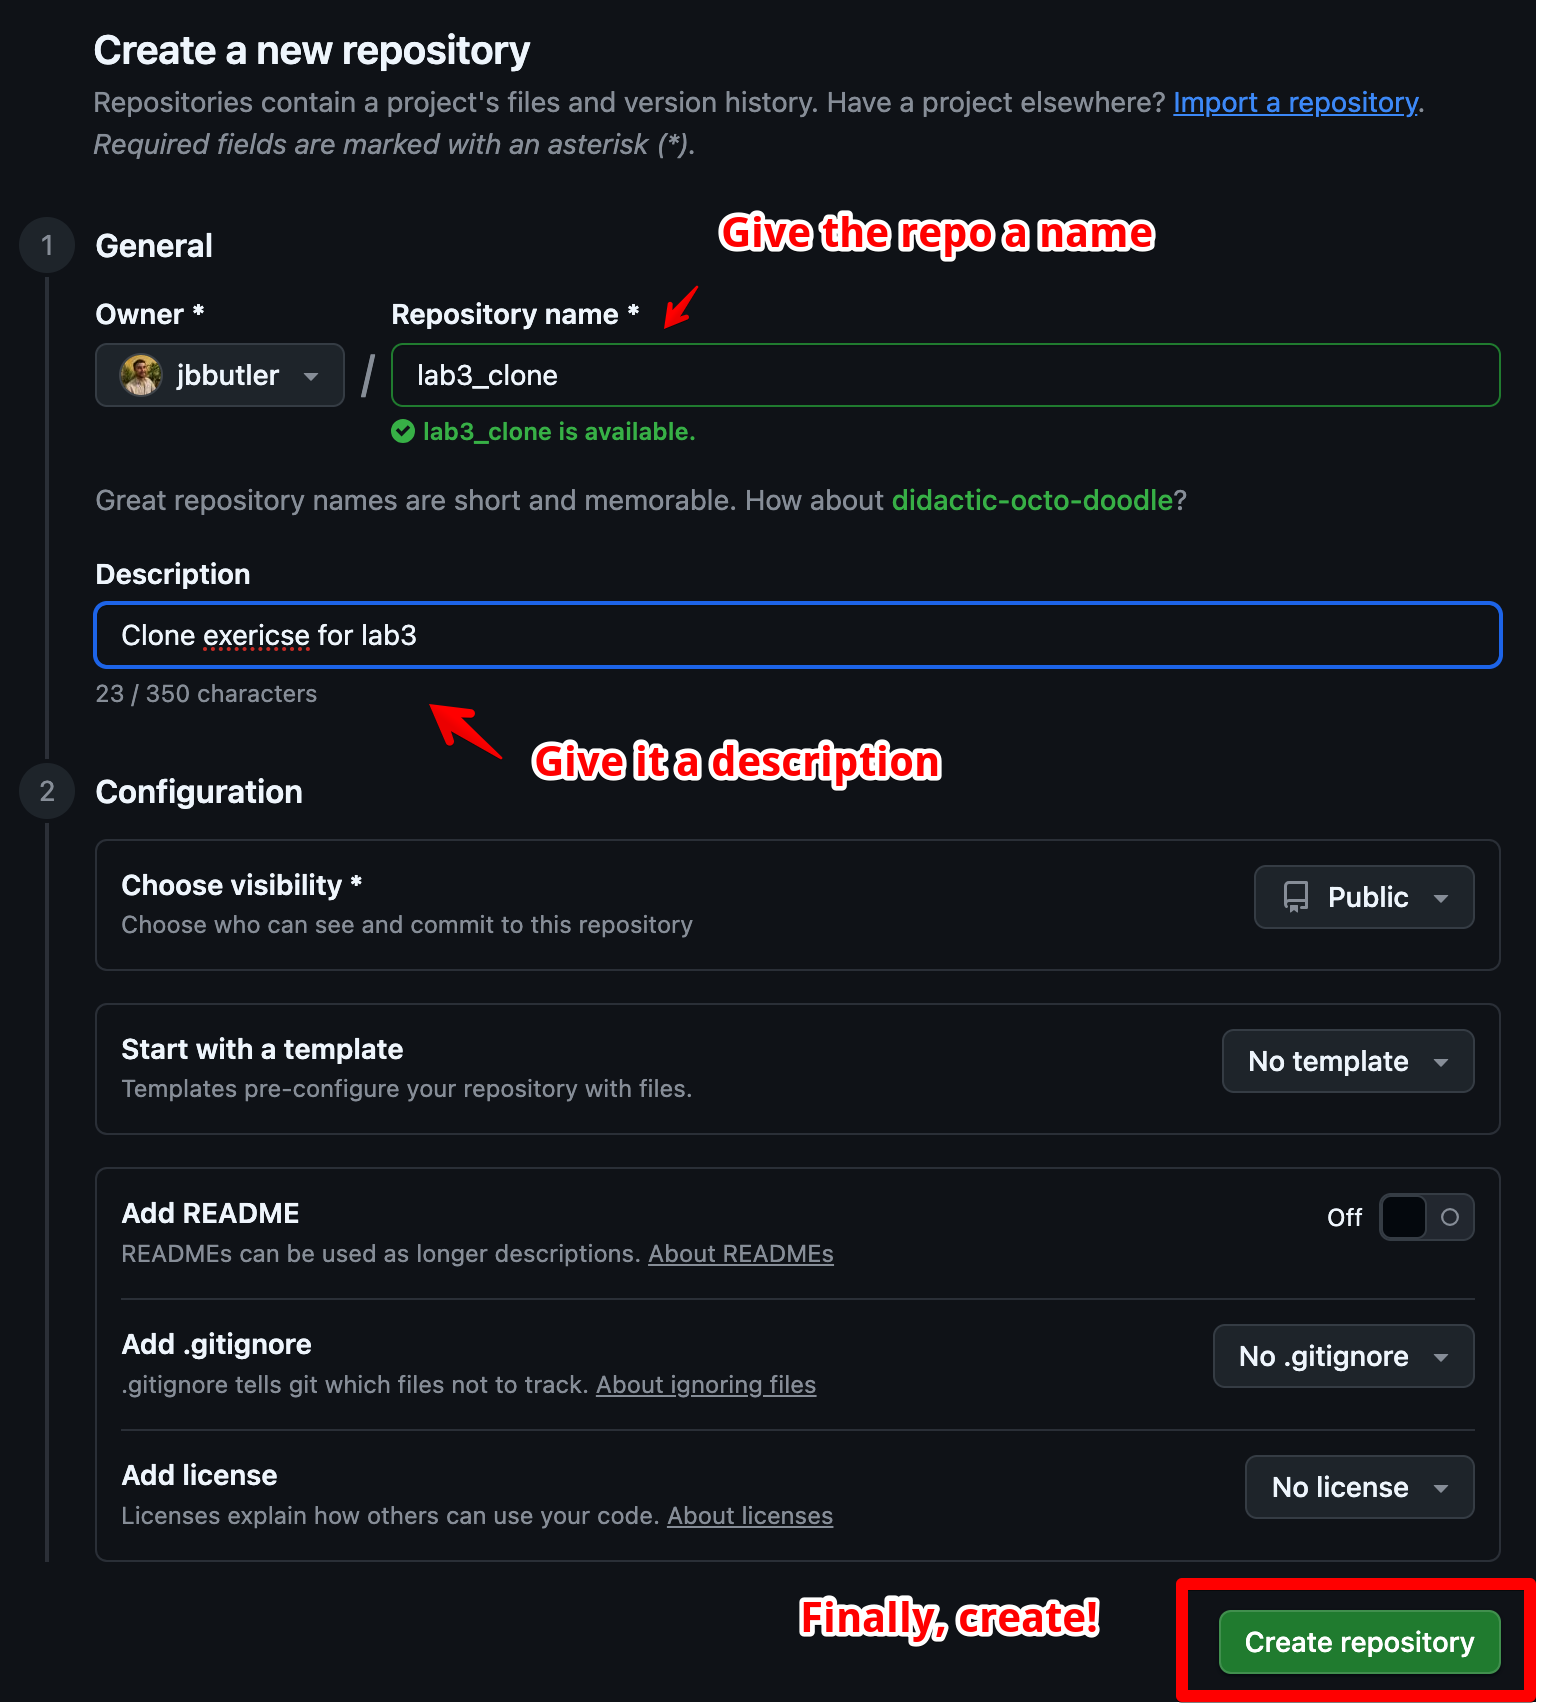

1. Clone the repo onto the JupyterHub with `git clone <repo_url>`.
1. Create a text file with any piece of text in it. Add, commit, and push your change.
1. In GitHub (the website, not in your Hub session), refresh the page and verify your new file is there. Then, make some edit to that text file and commit it, *all within GitHub*.
1. Going back to the JupyterHub, pull these changes to your local repository using `git pull`. You should see the text file contents have changed to what you just did on the GitHub website.

#### Syncing with an Existing Local Repo

Let's say we wanted to create a GitHub repo, but instead of starting from scratch, we want to sync it with an existing local repo.

1. Let's first create a local git repo with some content, simulating a local repo with important info we'd like to sync to a GitHub remote repo. Create a folder called `lab3_sync`, and instantiate a git repository in it with `git init`.
1. Add a text file with some random text. Commit it.
1. Now, go back to GitHub and follow the same steps as above to create a new repo (call it `lab3_sync`).
1. To sync this repo with your existing local repo, follow the steps under "..or push an existing repo from the command line". Try to decipher what each step is doing, relative to your mental model of how git operates.

In either of the above cases, we now have a local copy of a git repo that is connected to a remote copy hosted on GitHub. For the next exercise, let's just work with the `lab3_sync` local git repo, although this exercise works equally well with the cloned one.

Create a new branch in your local repository (using what we learned last lab), make a change, and try to push it to GitHub. What happens when you do this? If you try to `git push` changes in a new branch that you just created, you will receive the following message error `fatal: The current branch <branch name> has no upstream branch`. This is because you have just created the branch in local and not in remote. Instead, the first time you push a file to a new branch you have to do `git push -u origin <branch name>` (`-u` is just a shortcut for `--set-upstream`).

## 2. Collaborating on GitHub with a small team

For this part of the lab, we are going to set up a shared collaboration with one partner.  This will show the basic workflow of collaborating on a project with a small team where everyone have write privileges to the same repository.  

We will have two people, let's call them Alice and Bob, sharing a repository.  Alice will be the owner of the repository and she will give Bob write privileges. Decide on who in your pair will be Alice and who will be Bob.

### 2.1  Simple Synchronization

We begin with a simple synchronization example, much like we just did in the previous lab, but now between **two people** instead of one person.  

1. Alice creates a new repository in GitHub with some basic text files on it. For now, let's make this repository hosted in Alice's personal GitHub account and let's make the repository public. 
1. Bob clones Alice's repository.
1. Bob makes changes to a file and commits them locally.
1. Bob pushes his changes to GitHub. Now, in order to Bob to be able to push changes, he needs to be added by Alice as a collaborator of her respository. Alice needs to add Bob as collaborator in her Github setting page. One more detail: Alice needs to be sure that the repo has permission to use the GitHub app we are using for the course! in order to do that, Alice needs first to authenticate and then go the config page in the app and be sure the new repository is listed.
1. Alice pulls Bob's changes into her own repository.

Next, we will have both making non-conflicting changes each, and commit them locally.  Then both try to push their changes:

1. Alice adds a new file, `alice.txt` to the repository and commits.
1. Add a tag to this stage of the repository. You can learn more about [tag](https://mirrors.edge.kernel.org/pub/software/scm/git/docs/git-tag.html) here. In which cases do you think it will be useful to use tags?
1. Bob adds `bob.txt` and commits.
1. Alice pushes to GitHub.
1. Bob tries to push to GitHub.  What happens here?

The problem is that Bob's changes create a commit that conflicts with Alice's, so GitHub refuses to apply the changes in the remote. This forces Bob to first merge in his machine. If there is a conflict in the merge, Bob needs to deal with the conflict manually (git could try to do the merge on the server, but in that case if there's a conflict, the server repository would be left in a conflicted state without a human to fix things up).  The solution is for Bob to first pull the changes.

Next, let's have Bob creating a new branch, commiting changes in that branch to GitHub and then Alice retrieving the new branch to her local repository. 

1. In his local repository, Bob creates a new branch (see previous lab).
1. Bob commits new changes to his branch and then try to push this changes to the remote repository in GitHub. 
1. Alice now pull the new branch from GitHub. Can Alice display Bob's new branch with `git branch`? What happen when we see `git branch --all`?.

### 2.2 GitHub with conflicts

Follow the same workflow than before, but now try to induce a conflict. In order to induce a conflict, 
1. Both Alice and Bob need to make changes in the same line of the text files and commit these changes. 
1. After commiting, one of them will push the changes to GitHub. 
1. Right after, the other will try to pull and they will see a merge conflict. How do we solve this? In the same way you solved branch merging conflicts last lecture! Try to `git merge origin main`, and then open up the conflicting file and specify which changes you'd like to keep. Add and commit and push.

Note: merge conflicts can get pretty messy, especially in big projects! To avoid having to do a merge conflict, you can always run `git merge --abort`, and then try to avoid having a merge conflict. 

### 2.3 Working directly in GitHub

So far we were using GitHub just to host our remote repository, but GitHub also allow us to make operations like quick changes, documenting issues or just viewing the state of our repository, including past versions. 

Explore a little bit your GitHub repository. Specifically, 
1. Modify a text file and commit these changes from GitHub. 
1. How do you see different branches in GitHub? Are these the same you have in your local machine?
1. Alice added Bob as a collaborator in the repository already. Have one person open a new issue and tag the other person in that issue. 
1. Review past versions of the repositories. 

## 3. Extra

If you already finished all the previous tasks, you are welcome to explore some more useful git commands!
- [show](http://www.kernel.org/pub/software/scm/git/docs/git-show.html)
- [reflog](http://www.kernel.org/pub/software/scm/git/docs/git-reflog.html)
- [rebase](http://www.kernel.org/pub/software/scm/git/docs/git-rebase.html)
- [fetch](https://mirrors.edge.kernel.org/pub/software/scm/git/docs/git-fetch.html)

Can you think in a situation where these commands may result useful? For example, instead of using `git pull`, can you do the same with `git fetch` and then `git merge`? If so, what can be the advantage of doing such a thing?